In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

### Load metadata

In [3]:
metadata = pd.read_csv("../../metadata.csv", sep=";")

### Load features and labels

In [45]:
X = pd.read_csv("../../taxonomy/species_data.csv", sep=";").set_index("Sample", drop=True)
y = pd.read_csv("../../labels.csv", sep=";").set_index("Sample", drop=True)

### Select only 1 of 2 datasets

In [46]:
# y = y["Label"]
X = X.loc[metadata[metadata["BioProject"] == "PRJNA757365"]["Run"]]
y = y.loc[metadata[metadata["BioProject"] == "PRJNA757365"]["Run"]]["Label"]

## log transformation

In [47]:
# perform a log transformation on the data
X_log = np.log(X + 1)
X_log

,Gorilla gorilla,Saccharomyces cerevisiae,Homo sapiens,Chryseobacterium sp. LAM-KRS1,Pongo abelii,Mangifera indica,Cyprinus carpio,Hylobates moloch,Pipra filicauda,Pan troglodytes,...,Methylonatrum kenyense,Candidatus Nardonella dryophthoridicola,Wohlfahrtiimonas larvae,Buchananvirus Sa179lw,Halospina denitrificans,Dehalogenimonas alkenigignens,Swiduovirus swi2,Shuimuvirus IME207,Akiravirus akira,Pseudohongiella spirulinae
Sample,,,,,,,,,,,,,,,,,,,,,
SRR15595353,9.386812,0.000000,14.775083,0.0,9.183380,0.0,0.000000,0.0,0.0,9.354527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595352,9.359880,0.000000,14.730431,0.0,9.167224,0.0,0.000000,0.0,0.0,9.356430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595351,9.896513,0.000000,15.181342,0.0,9.595875,0.0,0.000000,0.0,0.0,9.810988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595350,0.000000,0.000000,6.091310,0.0,0.000000,0.0,0.693147,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595349,9.629840,0.000000,15.041867,0.0,9.355133,0.0,0.000000,0.0,0.0,9.739791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR15595248,0.000000,0.000000,7.740664,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595247,9.460632,0.000000,14.866044,0.0,9.419060,0.0,0.000000,0.0,0.0,9.521275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15595246,0.000000,3.091042,6.484635,0.0,0.000000,0.0,0.693147,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalize features using sparse matrix

In [48]:
# Create a sparse matrix representation of the data
X_sparse = csr_matrix(X_log)

# Scale the data using sparse standardization
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_sparse)
X_dense = X_scaled.toarray()
X_dense.shape

(80, 479)

# Estimate how many components use for PCA based on explained variance

## Perform PCA

In [49]:
# Perform PCA
pca = PCA()
pca.fit(X_dense)

PCA()

## Calculate the explained variance

In [52]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
cumulative_explained_variance
explained_variance

array([1.24309632e-01, 7.18247383e-02, 6.98537893e-02, 4.44406836e-02,
       4.31878462e-02, 3.90700618e-02, 3.73983020e-02, 3.69175739e-02,
       3.60597994e-02, 3.20114817e-02, 3.13116991e-02, 2.98442222e-02,
       2.75646825e-02, 2.36327226e-02, 2.20688487e-02, 2.15404056e-02,
       2.14733582e-02, 2.03325721e-02, 1.92815968e-02, 1.83716955e-02,
       1.77817804e-02, 1.68997478e-02, 1.64945477e-02, 1.49985423e-02,
       1.42535902e-02, 1.34317176e-02, 1.26699583e-02, 1.15796473e-02,
       1.06490130e-02, 9.38436663e-03, 9.06486291e-03, 8.76145611e-03,
       8.74116832e-03, 8.73216728e-03, 7.52591055e-03, 6.61327065e-03,
       6.13739224e-03, 5.98074812e-03, 4.99767028e-03, 4.68566607e-03,
       3.64894726e-03, 3.24921977e-03, 3.12779934e-03, 2.65244889e-03,
       2.12516503e-03, 1.76801731e-03, 1.52662255e-03, 9.26455617e-04,
       5.17421147e-04, 2.94918641e-04, 1.23947447e-04, 5.21570699e-05,
       4.46336594e-05, 3.32918124e-05, 1.79746912e-05, 6.52846309e-06,
      

## Plot the cumulative explained variance

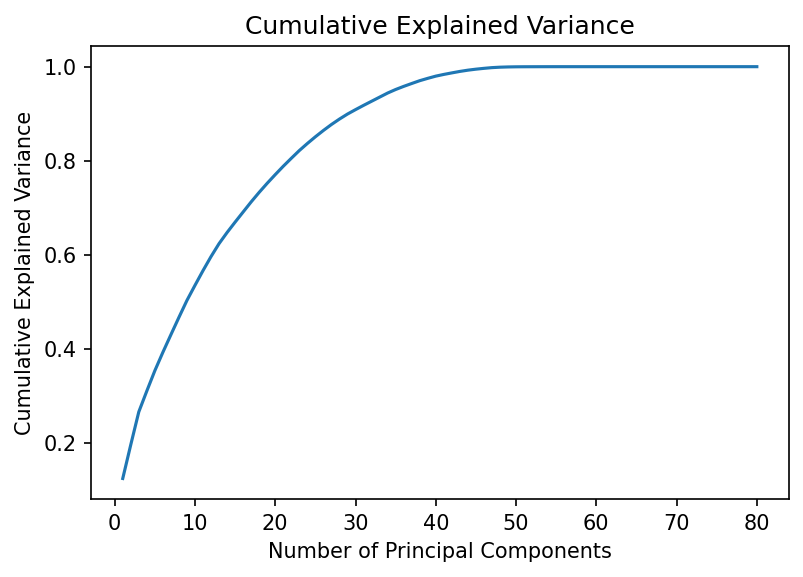

In [51]:
fig = plt.figure(dpi=150)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Run models on transformed features

## Instantiate PCA with the desired number of principal components from the previous section and split the data

In [32]:
n_components = 10
pca = PCA(n_components=n_components)

# Fit and transform data
pca.fit(X_dense)
transformed = pca.transform(X_dense)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.3, random_state=42)

## Logistic Regression

In [33]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4166666666666667


## SVM

### linear kernel

In [34]:
# Fit SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3333333333333333
